In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')

from load_data import load_data

## Load datasets

In [2]:
load = False

if load:
    df_total, df_daily_cases = load_data()
else:
    df_total = pd.read_csv("data/total_cases.csv", index_col=0, header=0)
    df_daily_cases = pd.read_csv("data/daily_cases.csv", index_col=0, header=0)

## EDA

### Analysing dataset of total cases

In [3]:
df_total.head()

,country_code,country,total_confirmed,total_deaths,total_recovered,last_updated
0,UA,Ukraine,10861,272,1413,2020-05-01T00:00:07.000Z
1,UA,Ukraine,11411,279,1498,2020-05-02T00:00:07.000Z
2,UA,Ukraine,11913,288,1548,2020-05-03T00:00:08.000Z
3,UA,Ukraine,12331,303,1619,2020-05-04T23:59:01.000Z
4,UA,Ukraine,12697,316,1875,2020-05-05T00:00:09.000Z


In [4]:
features = ["total_confirmed", "total_deaths", "total_recovered"]

In [5]:
df_total['datetime'] = pd.to_datetime(df_total.last_updated)
df_total['year'] = pd.DatetimeIndex(df_total.datetime).year
df_total['month'] = pd.DatetimeIndex(df_total.datetime).month
df_total['day'] = pd.DatetimeIndex(df_total.datetime).day
df_total.drop('last_updated', axis=1, inplace=True)

df_total.head()

,country_code,country,total_confirmed,total_deaths,total_recovered,datetime,year,month,day
0,UA,Ukraine,10861,272,1413,2020-05-01 00:00:07+00:00,2020,5,1
1,UA,Ukraine,11411,279,1498,2020-05-02 00:00:07+00:00,2020,5,2
2,UA,Ukraine,11913,288,1548,2020-05-03 00:00:08+00:00,2020,5,3
3,UA,Ukraine,12331,303,1619,2020-05-04 23:59:01+00:00,2020,5,4
4,UA,Ukraine,12697,316,1875,2020-05-05 00:00:09+00:00,2020,5,5


In [6]:
df_total.describe()

,total_confirmed,total_deaths,total_recovered,year,month,day
count,184.000000,184.000000,184.000000,184.0,184.000000,184.000000
mean,109308.929348,2296.614130,48909.097826,2020.0,7.500000,15.836957
std,97995.486579,1759.071109,41401.482584,0.0,1.714611,8.878386
min,10861.000000,272.000000,1413.000000,2020.0,5.000000,1.000000
25%,32309.500000,909.250000,14459.250000,2020.0,6.000000,8.000000
50%,70470.000000,1701.000000,39030.000000,2020.0,7.500000,16.000000
75%,160441.500000,3283.000000,71188.500000,2020.0,9.000000,23.250000
max,387481.000000,7196.000000,158928.000000,2020.0,10.000000,31.000000


<Figure size 1440x1080 with 0 Axes>

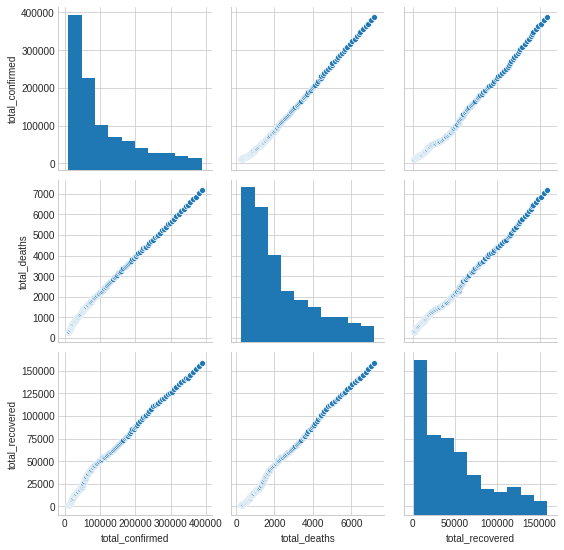

In [7]:
plt.figure(figsize=(20, 15))
sns.pairplot(df_total[features])
plt.show()

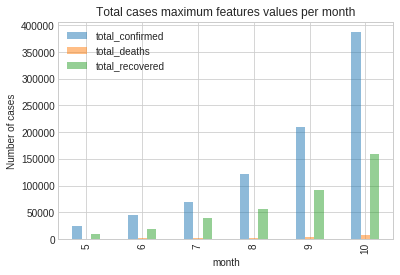

In [8]:
# plt.figure(figsize=(20, 15))
df_total[features + ['month']].groupby('month').max().plot(
    kind='bar', alpha=0.5,
    # figsize=(20, 15),
    title="Total cases maximum features values per month"
)
plt.ylabel("Number of cases")
plt.show()

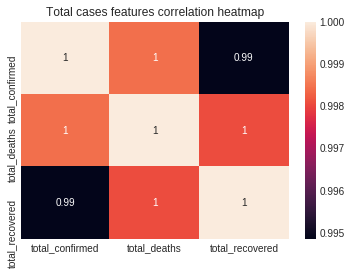

In [9]:
# plt.figure(figsize=(20, 15))
sns.heatmap(df_total[features].corr(), annot=True)
plt.title("Total cases features correlation heatmap")
plt.show()

### Analysing dataset of daily cases

In [10]:
df_daily_cases.head()

,country,last_updated,new_infections,new_deaths,new_recovered
0,Ukraine,2020-05-01T00:00:00.000Z,540,11,0
1,Ukraine,2020-05-02T00:00:00.000Z,550,11,85
2,Ukraine,2020-05-03T00:00:00.000Z,550,9,50
3,Ukraine,2020-05-04T00:00:00.000Z,418,15,71
4,Ukraine,2020-05-05T00:00:00.000Z,418,15,256


In [11]:
features = ["new_infections", "new_deaths", "new_recovered"]

In [12]:
df_daily_cases['datetime'] = pd.to_datetime(df_daily_cases.last_updated)
df_daily_cases['year'] = pd.DatetimeIndex(df_daily_cases.datetime).year
df_daily_cases['month'] = pd.DatetimeIndex(df_daily_cases.datetime).month
df_daily_cases['day'] = pd.DatetimeIndex(df_daily_cases.datetime).day
df_daily_cases.drop('last_updated', axis=1, inplace=True)

df_daily_cases.head()

,country,new_infections,new_deaths,new_recovered,datetime,year,month,day
0,Ukraine,540,11,0,2020-05-01 00:00:00+00:00,2020,5,1
1,Ukraine,550,11,85,2020-05-02 00:00:00+00:00,2020,5,2
2,Ukraine,550,9,50,2020-05-03 00:00:00+00:00,2020,5,3
3,Ukraine,418,15,71,2020-05-04 00:00:00+00:00,2020,5,4
4,Ukraine,418,15,256,2020-05-05 00:00:00+00:00,2020,5,5


In [13]:
df_daily_cases.describe()

,new_infections,new_deaths,new_recovered,year,month,day
count,184.000000,184.000000,184.000000,184.0,184.000000,184.000000
mean,2135.641304,42.331522,861.875000,2020.0,7.500000,15.836957
std,2018.082816,36.946482,794.801883,0.0,1.714611,8.878386
min,325.000000,8.000000,0.000000,2020.0,5.000000,1.000000
25%,676.750000,17.000000,341.750000,2020.0,6.000000,8.000000
50%,1135.000000,25.000000,591.000000,2020.0,7.500000,16.000000
75%,3000.250000,56.250000,1035.500000,2020.0,9.000000,23.250000
max,8752.000000,173.000000,3902.000000,2020.0,10.000000,31.000000


<Figure size 1440x1080 with 0 Axes>

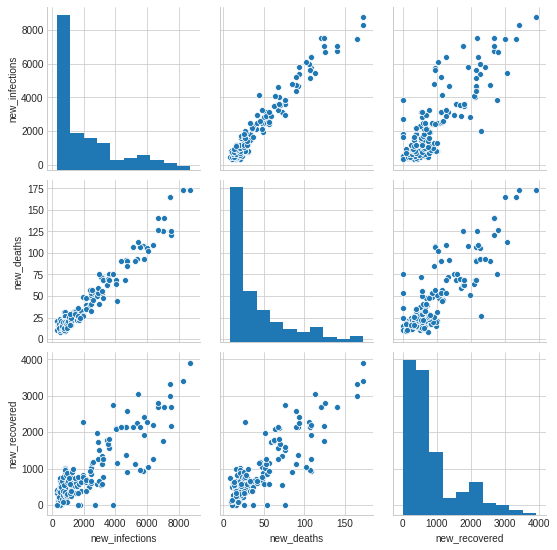

In [14]:
plt.figure(figsize=(20, 15))
sns.pairplot(df_daily_cases[features])
plt.show()

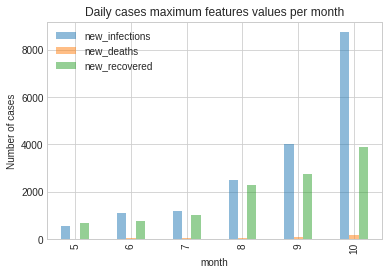

In [15]:
df_daily_cases[features + ['month']].groupby('month').max().plot(
    kind='bar', alpha=0.5,
    # figsize=(20, 15),
    title="Daily cases maximum features values per month"
)
plt.ylabel("Number of cases")
plt.show()

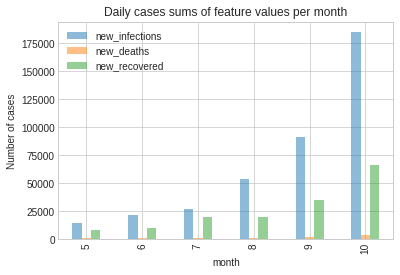

In [16]:
df_daily_cases[features + ['month']].groupby('month').sum().plot(
    kind='bar', alpha=0.5,
    # figsize=(20, 15),
    title="Daily cases sums of feature values per month"
)
plt.ylabel("Number of cases")
plt.show()

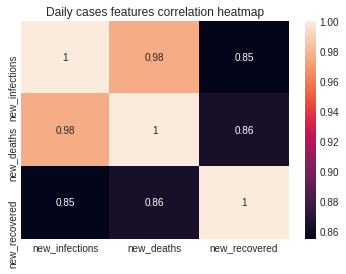

In [17]:
# plt.figure(figsize=(20, 15))
sns.heatmap(df_daily_cases[features].corr(), annot=True)
plt.title("Daily cases features correlation heatmap")
plt.show()

## Additional feature &mdash; susсeptibles

> In order to modelize possible vaccination scenarios, we will need to add the number of susceptibles to *COVID-19* individuals. For each day, this feature will be calculated according to the following formula:

$$new\_susceptibles_t = new\_susceptibles_{t - 1} - new\_infected_t - new\_deaths_t.$$

> For the first day, May 1, 2020 ($t = 1$), $new\_susceptibles_0$ will be equal to the total population of Ukraine as of the relevant date (see [source](https://index.minfin.com.ua/ua/reference/people/)):

$$new\_susceptibles_0 = 41806,2 \cdot 10^3$$

In [18]:
initial_susceptibles = 41806.2e3

In [19]:
def get_susceptibles(infections, deaths, initial_susceptibles=initial_susceptibles):
    susceptibles = []

    new_susceptibles = initial_susceptibles
    for index, (n_infected, n_dead) in enumerate(zip(infections, deaths)):
        new_susceptibles -= n_infected + n_dead
        susceptibles.append(new_susceptibles)

    return susceptibles

In [20]:
df_daily_cases["new_susceptibles"] = get_susceptibles(
    df_daily_cases.new_infections.to_list(),
    df_daily_cases.new_deaths.to_list(),
)

features.append("new_susceptibles")

df_daily_cases[features].head()

,new_infections,new_deaths,new_recovered,new_susceptibles
0,540,11,0,41805649.0
1,550,11,85,41805088.0
2,550,9,50,41804529.0
3,418,15,71,41804096.0
4,418,15,256,41803663.0


## Data split and normalization

In [21]:
# import some useful packages:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Activation

from sklearn.model_selection import train_test_split

### Data conversion for the training of language model

For each example/sequence and each possible starting day in this example/sequence, we create two sequences
- an input sequence: 
  - which contains a sub-sequence of length ```sequence_length```;  this sub-sequence range from the day $t$ to the day $t+sequence\_length-1$;
- an output sequence:
  - which contains the following day to be predicted, the one at position $t+sequence\_length$.

The training is therefore performed by giving to the model a set of sequences as input and asking the network to predict each time the cases of the day that should come right after this sequence.

In [22]:
# Define input shapes:
n_x = len(features)
sequence_length = 5

In [23]:
# Split data:
df_train, df_test = train_test_split(df_daily_cases[features], test_size=.15, shuffle=False)

print(f"Training dataset size: {df_train.shape}\n"
      f"Test dataset size: {df_test.shape}")

Training dataset size: (156, 4)
Test dataset size: (28, 4)


In [24]:
df_train.head()

,new_infections,new_deaths,new_recovered,new_susceptibles
0,540,11,0,41805649.0
1,550,11,85,41805088.0
2,550,9,50,41804529.0
3,418,15,71,41804096.0
4,418,15,256,41803663.0


In [25]:
# Normalize training data:
X_train_min = df_train.min().values
X_train_max = df_train.max().values
df_train = df_train.apply(lambda x: (x - X_train_min) / (X_train_max - X_train_min), axis=1)
df_train.head()

,new_infections,new_deaths,new_recovered,new_susceptibles
0,0.049585,0.035714,0.000000,1.000000
1,0.051891,0.035714,0.030920,0.997508
2,0.051891,0.011905,0.018188,0.995026
3,0.021448,0.083333,0.025828,0.993103
4,0.021448,0.083333,0.093125,0.991180


In [26]:
X_train_list = []
Y_train_list = []

for t in range(df_train.shape[0] - sequence_length):
    X_train_list.append(df_train.iloc[t:t + sequence_length].values)
    Y_train_list.append(df_train.iloc[t + sequence_length].values)

X_train = np.asarray(X_train_list)
Y_train = np.asarray(Y_train_list)

print(f"X_train shape: {X_train.shape}\n"
      f"Y_train shape: {Y_train.shape}")

X_train shape: (151, 5, 4)
Y_train shape: (151, 4)


## Building RNN

In [27]:
# Define model hyperparameters:
batch_size = None
epochs = 5
learning_rate = .01
hidden_units = [64]
dropouts = [0]

In [28]:
model = Sequential()
model.add(Input(shape=(sequence_length, n_x)))
for (index, units), dropout in zip(enumerate(hidden_units), dropouts):
    if index < len(hidden_units) - 1:
        model.add(LSTM(units, name="LSTM" + str(index + 1), return_sequences=True))
    else:
        model.add(LSTM(units, name="LSTM" + str(index + 1)))
    # model.add(Dropout(dropout, name="Dropout" + str(index + 1)))
model.add(Dense(hidden_units[-1], activation="tanh", name="FC1"))
model.add(Dense(n_x, name="Output"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM1 (LSTM)                 (None, 64)                17664     
_________________________________________________________________
FC1 (Dense)                  (None, 64)                4160      
_________________________________________________________________
Output (Dense)               (None, 4)                 260       
Total params: 22,084
Trainable params: 22,084
Non-trainable params: 0
_________________________________________________________________


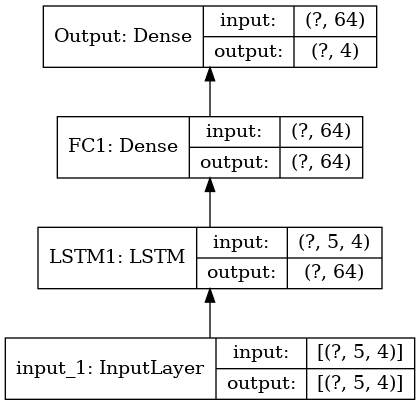

In [29]:
tf.keras.utils.plot_model(model, 'COVID-19_RNN.png', show_shapes=True, rankdir='BT')

In [30]:
# defining Root MSE as an evaluation metric:
def rmse(Y_pred, Y_true):
    return tf.sqrt(tf.reduce_mean(tf.square(Y_pred - Y_true)))

In [39]:
model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=learning_rate), metrics=[rmse, 'mse'])
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/5
5/5 [==============================] - 0s 2ms/step - loss: 0.0132 - rmse: 0.1122 - mse: 0.0132
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0989 - mse: 0.0100
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0927 - mse: 0.0089
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0091 - rmse: 0.0945 - mse: 0.0091
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0891 - mse: 0.0081


## Evaluating model performance
### Evaluation Metrics

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MSE** "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is more popular than MSE, because RMSE is interpretable in the "y" units.

In [40]:
df_test_norm = df_test.apply(lambda x: (x - X_train_min) / (X_train_max - X_train_min), axis=1)
df_test_norm.head()

,new_infections,new_deaths,new_recovered,new_susceptibles
156,1.000000,1.000000,0.498363,-0.021109
157,0.879843,0.428571,0.416515,-0.039691
158,0.927814,0.976190,0.781739,-0.059401
159,1.021218,0.976190,0.934522,-0.080910
160,1.169742,1.011905,0.823208,-0.105293


In [41]:
# Make predictions:
X_test_seq = df_test_norm[:sequence_length].values
Y_pred = np.zeros(df_test_norm.shape)
Y_pred[:sequence_length] = X_test_seq
for t in range(df_test_norm.shape[0] - sequence_length):
    y_pred = model.predict(np.expand_dims(X_test_seq, axis=0))
    Y_pred[t + sequence_length] = y_pred
    X_test_seq = Y_pred[t + 1:t + sequence_length + 1]

Y_test = df_test_norm

In [42]:
print(f"Test RMSE: {rmse(Y_pred[sequence_length:], Y_test[sequence_length:])}")

Test RMSE: 0.2644888561220182


In [43]:
# Rescale and round predictions:
Y_test = df_test
Y_pred = np.round(Y_pred * (X_train_max - X_train_min) + X_train_min)

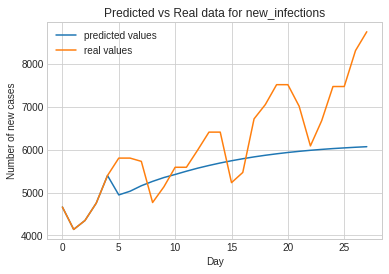

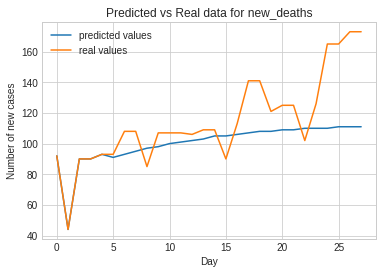

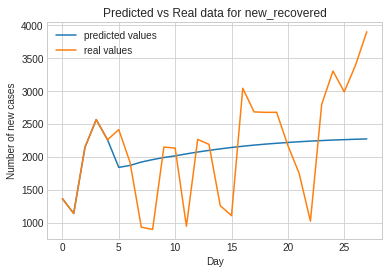

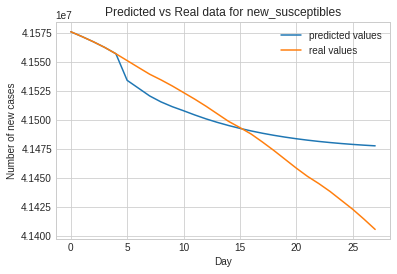

In [44]:
time = np.arange(df_test.shape[0])

for index, feature in enumerate(features):
    # plt.figure(figsize=(15, 12))
    plt.plot(time, Y_pred[:, index])
    plt.plot(time, Y_test[feature])
    plt.xlabel("Day")
    plt.ylabel("Number of new cases")
    plt.legend(["predicted values", "real values"])
    plt.title(f"Predicted vs Real data for {feature}")
    plt.show()

no_vaccination_infected = Y_pred[:, 0]
no_vaccination_R_0 = [1] + [Y_pred[index, 0] / Y_pred[index - 1, 0] for index in range(1, df_test_norm.shape[0])]
no_vaccination_I_cumulated = no_vaccination_infected.sum()

## Vaccination modeling

> Now let's make the same October predictions, but with a small difference:

> The number of susceptible individuals ($new\_susceptibles$) will be artificially decreased after every predicted day. Such manipulation is explained by the fact of the constant fraction $v$ of vaccinated persons. The minimal level of vaccination $v_{ef}$ is defined according to the condition that **the basic reproduction number** $R_0 < 1$, in other words, if we were calculating it every day:

$$R_{0t} = \frac{new\_infections_{t + 1}}{new\_infections_t}. \tag{1}$$

> In the case of successful vaccination of a constant proportion of $v$ people over time, the proportion of susceptible individuals in the population tends to the value $new\_susceptibles \rightarrow (1 - ef \cdot v)$, where $ef$ &mdash; vaccine efficiency (constant through time, $ef \in (0;1]$), and the potential for transmission of the causative agent of acute viral infection decreases from $R_0$ to $R_v = R_0 \cdot (1 - ef \cdot v)$. Given the spread of viral infection in the population, the optimal proportion of $v$ is determined to satisfy the inequality:

$$R_{vt} = \frac{new\_infections_{t + 1}}{new\_infections_t} \cdot (1 - ef \cdot v_t) < 1, \tag{2}$$

> then, from the formula $(2)$, we obtain:

$$v_{eft} > \frac{1}{ef} \cdot (1 - \frac{new\_infections_{t + 1}}{new\_infections_t}). \tag{3}$$

> The number of vaccinated individuals $V$ and the number of susceptible individuals, who lost their immunity after vaccination $new\_susceptibles^{(2)}$ will be also calculated by virtue of a decreased fraction of $new\_susceptibles$:

$$V_t = V_{t - 1} + ef \cdot v_{eft} \cdot new\_susceptibles_t, \tag{4}$$
$$new\_susceptibles^{(2)}_t = new\_susceptibles^{(2)}_{t - 1} + (1 - ef) \cdot v_{eft} \cdot new\_susceptibles_t, \tag{5}$$
$$new\_susceptibles_t = (1 - v_{eft}) \cdot new\_susceptibles_t. \tag{6}$$

> Both values $V$ and $new\_suscectibles^{(2)}$ are set to $0$ at the beginning of the predicted period (the vaccination has not started yet), which length is equal to the previously chosen window size `sequence_length = 5`.

> But now we also need to take into account the possible loss of immunity of some vaccinated individuals, who will therefore become the new susceptibles once again (which is the actual sense of $new\_susceptibles^{(2)}$ criterion). Such a transition is regulated by the constant through time parameter $w \in (0;1)$ so that the formulas $(4 - 5)$ will be rewritten as follows:

$$V_t = V_{t - 1} + ef \cdot v_{eft} \cdot new\_susceptibles_t - w \cdot V_{t - 1}, \tag{7}$$
$$new\_susceptibles^{(2)}_t = new\_susceptibles^{(2)}_{t - 1} + (1 - ef) \cdot v_{eft} \cdot new\_susceptibles_t + w \cdot V_{t - 1}. \tag{8}$$

**Note:** Let's simplify simulations for educational purposes by setting also $v_{ef}$ as constant through time.

In [90]:
def get_vaccination_predictions(df_test_norm, v_ef=.0, ef=.0, w=.0, sequence_length=5):
    S_v_cumulated = 0

    # Instanciate to zeros v_ef, V and new_susceptibles_2:
    V = np.zeros([df_test_norm.shape[0], 1])
    new_susceptibles_2 = np.zeros([df_test_norm.shape[0], 1])

    # Make predictions:
    X_test_seq = df_test_norm[:sequence_length].values
    Y_pred = np.zeros(df_test_norm.shape)
    Y_pred[:sequence_length] = X_test_seq
    for t in range(df_test_norm.shape[0] - sequence_length):
        # Make a prediction:
        y_pred = model.predict(np.expand_dims(X_test_seq, axis=0))
        Y_pred[t + sequence_length] = y_pred

        # Calculate V, new_susceptibles_2 (formulas (7) and (8) respectively)
        # and update predicted new_susceptibles (formula (6)):
        V[t + sequence_length] = V[t + sequence_length - 1] + ef * v_ef \
                                    * Y_pred[t + sequence_length, -1] - w * V[t + sequence_length - 1]
        new_susceptibles_2[t + sequence_length] = new_susceptibles_2[t + sequence_length - 1] \
                                    + (1 - ef) * v_ef * Y_pred[t + sequence_length, -1] \
                                    + w * V[t + sequence_length - 1]
        
        Y_pred_real = Y_pred[t + sequence_length, -1] * (X_train_max[-1] - X_train_min[-1]) + X_train_min[-1]
        S_v_cumulated += v_ef * Y_pred_real

        Y_pred[t + sequence_length, -1] *= 1 - v_ef

        # Create a new sequence:
        X_test_seq = Y_pred[t + 1:t + sequence_length + 1]

    # calculate R naught:
    R_0 = no_vaccination_R_0[:sequence_length] + [Y_pred[index, 0] * (1 - ef * v_ef) / Y_pred[index - 1, 0] \
                                                    for index in range(sequence_length, df_test_norm.shape[0])]

    return Y_pred, R_0, S_v_cumulated

In [91]:
# Set different v_ef, ef and w values:
v_efs = np.arange(.3, .9, .2)

Cost ratio for v = 0.3: 3.263774704311488e-05
Cost ratio for v = 0.5: 2.8788329647921694e-05
Cost ratio for v = 0.7: 2.5495030740918778e-05
Cost ratio for v = 0.9: 2.2732434416715876e-05


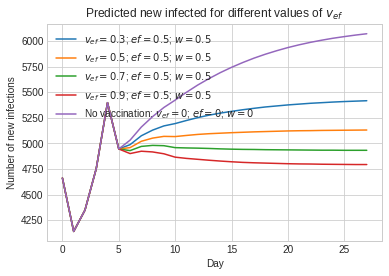

In [92]:
# plt.figure(figsize=(20, 12))
legend = []
R_0s = []

ef = .5
w = .5
for v_ef in v_efs:
    Y_pred, R_0, S_v_cumulated = get_vaccination_predictions(df_test_norm, v_ef=v_ef, ef=ef, w=w)

    # Normalize data:
    Y_pred = np.round(Y_pred * (X_train_max - X_train_min) + X_train_min)

    # Plot predicted new infections:
    plt.plot(time, Y_pred[:, 0])
    legend.append(f"$v_{{ef}} = {v_ef:.1f}$; $ef = {ef:.1f}$; $w = {w:.1f}$")

    R_0s.append(R_0)
    print(f"Cost ratio for v = {v_ef:.1f}: {(no_vaccination_I_cumulated - Y_pred[:, 0].sum()) / S_v_cumulated}")

# Without vaccination:
plt.plot(time, no_vaccination_infected)
legend.append("No vaccination: $v_{ef} = 0$; $ef = 0$; $w = 0$")

plt.xlabel("Day")
plt.ylabel("Number of new infections")
plt.legend(legend)
plt.title("Predicted new infected for different values of $v_{ef}$")
plt.show()

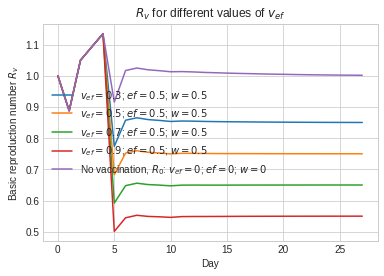

In [96]:
# Plot R_0s:
for R_0 in R_0s:
    plt.plot(time, R_0)

# Without vaccination:
plt.plot(time, no_vaccination_R_0)

plt.xlabel("Day")
plt.ylabel("Basic reproduction number $R_v$")
legend[-1] = "No vaccination, $R_0$: $v_{ef} = 0$; $ef = 0$; $w = 0$"
plt.legend(legend)
plt.title("$R_v$ for different values of $v_{ef}$")
plt.show()